<h1 style="text-align: center;">TF2202 Teknik Komputasi - Akar Persamaan Nonlinear</h1>

<h2 style="text-align: center;">Fadjar Fathurrahman</h2>

# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")
%matplotlib inline

In [3]:
import matplotlib
matplotlib.style.use("default")

# Metode Bisection (bagi dua)

## Ilustrasi metode bisection (cara manual)

Ide dari metode bisection fakta bahwa jika tanda dari $f(x_{1})$ dan $f(x_{2})$ berbeda, maka setidaknya ada satu akar dari persamaan $f(x) = 0$ ada dalam selang $(x_1,x_2)$.

Misalkan kita ingin mencari akar dari fungsi berikut:
$$
f(x) = 5x^3 - 5x^2 + 6x - 2
$$
Untuk memperoleh gambaran mengenai akar dari persamaan $f(x)=0$, kita akan membuat plot dari dari $f(x)$ terlebih dahulu.

In [1]:
def func_01(x):
    return 5*x**3 - 5*x**2 + 6*x - 2

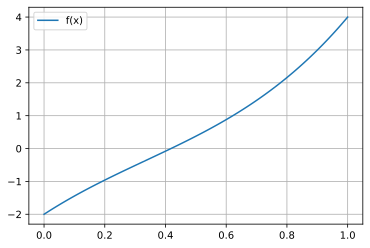

In [15]:
x = np.linspace(0,1,100)
y =  func_01(x)
plt.clf()
plt.plot(x, y, label="f(x)")
plt.legend()
plt.grid()

Dari plot di atas dapat dilihat bahwa akar dari $f(x)$ terletak di sekitar $x = 0.5$.
Sebagai ilustrasi untuk metode bisection kita akan menggunakan interval $x_1 = 0$ dan $x_2 = 1$.

Mari kita cek bahwa tanda $f(x_1)$ dan $f(x_2)$ memiliki tanda yang berbeda, atau $f(x_1)f(x_2) < 0$.

In [16]:
x1 = 0.0
x2 = 1.0
f1 = func_01(x1)
f2 = func_01(x2)
print("f1 = ", f1)
print("f2 = ", f2)
print(f1*f2 < 0)

f1 =  -2.0
f2 =  4.0
True


Fungsi `np.sign()` juga bisa digunakan untuk mengecek tanda positif atau negatif dari suatu bilangan.

In [17]:
np.sign(-2.0), np.sign(2.1)

(-1.0, 1.0)

Sekarang, kita perlu menentukan tebakan akar dari selang $x_1$ dan $x_2$. Dengan metode bisection, tebakan akar dihitung tepat berada di tengah selang yaitu:
$$
x_{r} = \frac{x_1 + x_2}{2}
$$

In [18]:
xr = 0.5*(x1 + x2)
xr

0.5

OK, sepertinya kita sudah berada dekat di akar sebenarnya. Mari kita cek nilai $f(x_r)$:

In [19]:
fxr = func_01(xr)
fxr

0.375

Ternyata nilai dari $f(x_r)$ tidak tepat pada 0. Mari buat plot $f(x)$ pada domain (interval) yang lebih sempit.

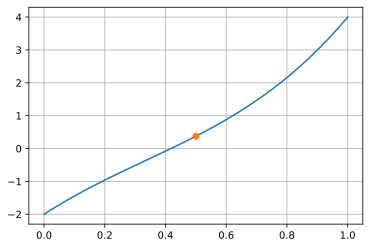

In [20]:
x = np.linspace(0.0, 1.0, 500)
y = func_01(x)
plt.clf()
plt.plot(x, y)
plt.plot(xr, fxr, marker="o") # Tandai nilai fx pada xr, yaitu (xr,fxr)
plt.grid()

Kita dapat memperbaiki tebakan akar dengan memilih rentang baru di mana kita akan mengaplikasikan lagi metode bisection. Kita sekarang memiliki 3 titik yaitu $x_1$, $x_2$, dan $x_r$, dengan nilai fungsi pada titik-titik tersebut adalah:

In [21]:
f1, f2, fxr

(-2.0, 4.0, 0.375)

Dengan informasi tersebut, kita dapat menggunakan $x_r$ sebagai pengganti dari $x_2$ karena selang ini lebih kecil dan diharapkan nilai tebakan akar dapat menjadi lebih dekat dengan akar sebenarnya.

In [22]:
x2 = xr
f2 = fxr

Cek apakah nilai fungsi pada interval baru ini berbeda tanda (hasil kali $f(x_{1})$ dan $f(x_2)$ adalah negatif.

In [23]:
print(f1*f2 < 0)

True


Kita hitung lagi tebakan akar $x_r$ sebagai nilai tengah antara $x_{1}$ dan $x_2$:

In [25]:
xr = 0.5*(x1 + x2)
fxr = func_01(xr)
fxr, xr

(-0.734375, 0.25)

Sepertinya nilai akar yang kita dapatkan masih belum baik.

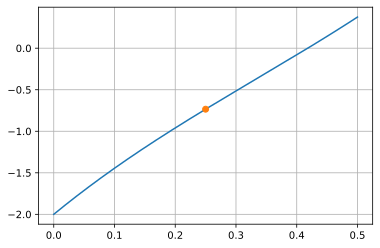

In [26]:
x = np.linspace(x1, x2, 500)
y = func_01(x)
plt.clf()
plt.plot(x, y)
plt.plot(xr, fxr, marker="o") # Tandai nilai fx pada xr, yaitu (xr,fxr)
plt.grid()

In [27]:
f1, f2, fxr

(-2.0, 0.375, -0.734375)

Kita akan melakukan kembali prosedur bisection. Untuk interval baru kita akan ganti $x_1$ dengan $x_r$.

In [28]:
x1 = xr
f1 = fxr

In [29]:
print(f1*f2 < 0)

True


Hitung kembali tebakan akar pada selang $x_1$ dan $x_2$

In [30]:
xr = 0.5*(x1 + x2)
fxr = func_01(xr)
fxr

-0.189453125

Nilai ini sudah lebih dekat dari tebakan-tebakan kita sebelumnya.

Untuk mendapatkan tebakan akar yang lebih baik kita akan lakukan sekali lagi metode bisection.

In [31]:
f1, f2, fxr

(-0.734375, 0.375, -0.189453125)

In [32]:
x1 = xr
f1 = fxr
print(f1*f2 < 0)

True


In [33]:
xr = 0.5*(x1 + x2)
fxr = func_01(xr)
fxr

0.086669921875

Tebakan ini lebih baik dari tebakan sebelumnya karena $f(x_r)$ yang diperoleh lebih dekat dengan 0. Kita dapat melakukan prosedur bisection sekali lagi.

In [34]:
f1, f2, fxr

(-0.189453125, 0.375, 0.086669921875)

In [35]:
x2 = xr
f2 = fxr

In [36]:
xr = 0.5*(x1 + x2)
fxr = func_01(xr)
fxr

-0.052459716796875

## Implementasi Python untuk metode bisection

Setelah melakukan iterasi metode bisection secara manual, sekarang kita akan membuat prosedur bisection dalam suatu subrutin (fungsi). Fungsi ini menerima masukan `f` sebagai fungsi yang akan dicari akarnya, `x1` dan `x2` sebagai input selang di mana akar akan dicari. Fungsi ini juga menggunakan `TOL` dengan nilai default `1e-10` untuk menentukan akurasi hasil yang diperoleh dengan akar sebenarnya dan juga `NiterMax` dengan nilai default `100` sebagai jumlah maksimum iterasi yang dilakukan.

In [4]:
def bisection(f, x1, x2, TOL=1e-10, NiterMax=100):
    
    f1 = f(x1)
    f2 = f(x2)
    
    if f1*f2 > 0:
        raise RuntimeError("f1 dan f2 memiliki tanda yang sama")

    for i in range(1,NiterMax+1):
        
        xr = 0.5*(x1 + x2)
        fxr = f(xr)
        
        if abs(fxr) <= TOL:
            print("Iterasi konvergen: akar ditemukan")
            return xr
        
        print("Iter = %5d, xr = %18.10f, abs(fxr) = %15.5e" % (i, xr, abs(fxr)))
    
        # f1 dan fxr berbeda tanda
        if f1*fxr < 0.0:
            x2 = xr
            f2 = fxr
        else:
            x1 = xr
            f1 = fxr
        
    print("WARNING: Konvergensi tidak diperleh setelah %d iterasi" % NiterMax)
    print("WARNING: Nilai tebakan akhir akan dikembalikan")
    return xr

## Contoh penggunaan `bisection`

Kita akan mengulangi langkah-langkah yang telah kita lakukan untuk mencari akar dari persamaan yang didefinisikan pada fungsi `func_01`. Interval awal yang kita gunakan adalah (0.0, 1.0) dan menggunakan jumlah iterasi dan syarat konvergensi default.

In [38]:
xr = bisection(func_01, 0.0, 1.0)

Iter =     1, xr =       0.5000000000, abs(fxr) =     3.75000e-01
Iter =     2, xr =       0.2500000000, abs(fxr) =     7.34375e-01
Iter =     3, xr =       0.3750000000, abs(fxr) =     1.89453e-01
Iter =     4, xr =       0.4375000000, abs(fxr) =     8.66699e-02
Iter =     5, xr =       0.4062500000, abs(fxr) =     5.24597e-02
Iter =     6, xr =       0.4218750000, abs(fxr) =     1.67809e-02
Iter =     7, xr =       0.4140625000, abs(fxr) =     1.79133e-02
Iter =     8, xr =       0.4179687500, abs(fxr) =     5.85616e-04
Iter =     9, xr =       0.4199218750, abs(fxr) =     8.09266e-03
Iter =    10, xr =       0.4189453125, abs(fxr) =     3.75230e-03
Iter =    11, xr =       0.4184570312, abs(fxr) =     1.58304e-03
Iter =    12, xr =       0.4182128906, abs(fxr) =     4.98635e-04
Iter =    13, xr =       0.4180908203, abs(fxr) =     4.35092e-05
Iter =    14, xr =       0.4181518555, abs(fxr) =     2.27558e-04
Iter =    15, xr =       0.4181213379, abs(fxr) =     9.20233e-05
Iter =    

Sama dengan sebelumnya namun menggunakan selang (0.0, 0.5), TOL=1e-9 dan jumlah iterasi maksimum 10. Pada kasus ini metode bisection belum dapat menemukan akar yang sesuai dengan TOL yang diberikan.

In [39]:
xr = bisection(func_01, 0.0, 0.5, TOL=1e-9, NiterMax=10)

Iter =     1, xr =       0.2500000000, abs(fxr) =     7.34375e-01
Iter =     2, xr =       0.3750000000, abs(fxr) =     1.89453e-01
Iter =     3, xr =       0.4375000000, abs(fxr) =     8.66699e-02
Iter =     4, xr =       0.4062500000, abs(fxr) =     5.24597e-02
Iter =     5, xr =       0.4218750000, abs(fxr) =     1.67809e-02
Iter =     6, xr =       0.4140625000, abs(fxr) =     1.79133e-02
Iter =     7, xr =       0.4179687500, abs(fxr) =     5.85616e-04
Iter =     8, xr =       0.4199218750, abs(fxr) =     8.09266e-03
Iter =     9, xr =       0.4189453125, abs(fxr) =     3.75230e-03
Iter =    10, xr =       0.4184570312, abs(fxr) =     1.58304e-03


In [40]:
xr = bisection(func_01, 0.0, 0.5, TOL=1e-9)

Iter =     1, xr =       0.2500000000, abs(fxr) =     7.34375e-01
Iter =     2, xr =       0.3750000000, abs(fxr) =     1.89453e-01
Iter =     3, xr =       0.4375000000, abs(fxr) =     8.66699e-02
Iter =     4, xr =       0.4062500000, abs(fxr) =     5.24597e-02
Iter =     5, xr =       0.4218750000, abs(fxr) =     1.67809e-02
Iter =     6, xr =       0.4140625000, abs(fxr) =     1.79133e-02
Iter =     7, xr =       0.4179687500, abs(fxr) =     5.85616e-04
Iter =     8, xr =       0.4199218750, abs(fxr) =     8.09266e-03
Iter =     9, xr =       0.4189453125, abs(fxr) =     3.75230e-03
Iter =    10, xr =       0.4184570312, abs(fxr) =     1.58304e-03
Iter =    11, xr =       0.4182128906, abs(fxr) =     4.98635e-04
Iter =    12, xr =       0.4180908203, abs(fxr) =     4.35092e-05
Iter =    13, xr =       0.4181518555, abs(fxr) =     2.27558e-04
Iter =    14, xr =       0.4181213379, abs(fxr) =     9.20233e-05
Iter =    15, xr =       0.4181060791, abs(fxr) =     2.42567e-05
Iter =    

In [41]:
xr = bisection(func_01, 0.3, 0.5, NiterMax=100)

Iter =     1, xr =       0.4000000000, abs(fxr) =     8.00000e-02
Iter =     2, xr =       0.4500000000, abs(fxr) =     1.43125e-01
Iter =     3, xr =       0.4250000000, abs(fxr) =     3.07031e-02
Iter =     4, xr =       0.4125000000, abs(fxr) =     2.48340e-02
Iter =     5, xr =       0.4187500000, abs(fxr) =     2.88452e-03
Iter =     6, xr =       0.4156250000, abs(fxr) =     1.09868e-02
Iter =     7, xr =       0.4171875000, abs(fxr) =     4.05420e-03
Iter =     8, xr =       0.4179687500, abs(fxr) =     5.85616e-04
Iter =     9, xr =       0.4183593750, abs(fxr) =     1.14926e-03
Iter =    10, xr =       0.4181640625, abs(fxr) =     2.81773e-04
Iter =    11, xr =       0.4180664063, abs(fxr) =     1.51934e-04
Iter =    12, xr =       0.4181152344, abs(fxr) =     6.49166e-05
Iter =    13, xr =       0.4180908203, abs(fxr) =     4.35092e-05
Iter =    14, xr =       0.4181030273, abs(fxr) =     1.07035e-05
Iter =    15, xr =       0.4180969238, abs(fxr) =     1.64029e-05
Iter =    

Contoh yang dengan input selang awal yang tidak memenuhi syarat bisection:

In [42]:
xr = bisection(func_01, 0.3, 0.4)

RuntimeError: f1 dan f2 memiliki tanda yang sama

## Soal 2

Sebagai contoh lain, kita akan mencari akar persamaan berikut:
$$
x^2 \left| \cos\left(\sqrt{x}\right) \right| = 5
$$
Untuk menggunakan fungsi `bisection` kita perlu mengubah persamaan tersebut dalam bentuk $f(x) = 0$:
$$
f(x) = x^2 \left| \cos\left(\sqrt{x}\right) \right| - 5 = 0
$$

In [5]:
def func_02(x):
    return x**2 * np.abs(np.cos(np.sqrt(x))) - 5

Kita perlu selang untuk tebakan awal akar. Untuk memperoleh informasi tersebut kita akan buat plot dari $f(x)$ terlebih dahulu.

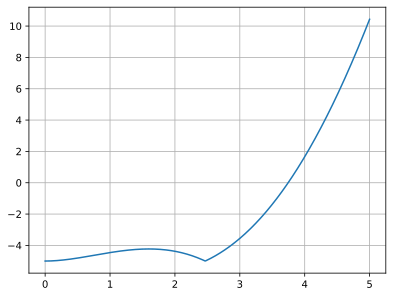

In [6]:
x = np.linspace(0,5,500)
y = func_02(x)
plt.clf()
plt.plot(x, y)
plt.grid()

Dari plot yang ditampilkan, sebuah akar terletak antara $x = 0$ dan $x = 5$.

In [7]:
xr = bisection(func_02, 0, 5)

Iter =     1, xr =       2.5000000000, abs(fxr) =     4.93536e+00
Iter =     2, xr =       3.7500000000, abs(fxr) =     2.87324e-02
Iter =     3, xr =       3.1250000000, abs(fxr) =     3.08887e+00
Iter =     4, xr =       3.4375000000, abs(fxr) =     1.69754e+00
Iter =     5, xr =       3.5937500000, abs(fxr) =     8.77063e-01
Iter =     6, xr =       3.6718750000, abs(fxr) =     4.34912e-01
Iter =     7, xr =       3.7109375000, abs(fxr) =     2.05785e-01
Iter =     8, xr =       3.7304687500, abs(fxr) =     8.92016e-02
Iter =     9, xr =       3.7402343750, abs(fxr) =     3.04035e-02
Iter =    10, xr =       3.7451171875, abs(fxr) =     8.77797e-04
Iter =    11, xr =       3.7475585938, abs(fxr) =     1.39167e-02
Iter =    12, xr =       3.7463378906, abs(fxr) =     6.51683e-03
Iter =    13, xr =       3.7457275391, abs(fxr) =     2.81886e-03
Iter =    14, xr =       3.7454223633, abs(fxr) =     9.70364e-04
Iter =    15, xr =       3.7452697754, abs(fxr) =     4.62426e-05
Iter =    

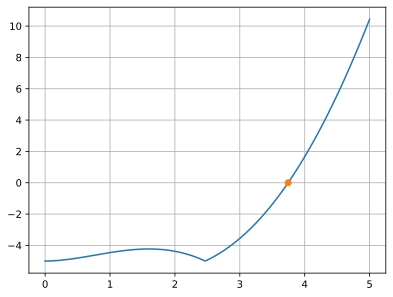

In [8]:
x = np.linspace(0,5,500)
y = func_02(x)
plt.clf()
plt.plot(x, y)
plt.plot(xr, func_02(xr), marker="o")
plt.grid()

Mari kita coba gunakan selang $x = 3$ dan $x = 4$.

In [9]:
xr = bisection(func_02, 3, 4)

Iter =     1, xr =       3.5000000000, abs(fxr) =     1.37950e+00
Iter =     2, xr =       3.7500000000, abs(fxr) =     2.87324e-02
Iter =     3, xr =       3.6250000000, abs(fxr) =     7.02772e-01
Iter =     4, xr =       3.6875000000, abs(fxr) =     3.43907e-01
Iter =     5, xr =       3.7187500000, abs(fxr) =     1.59314e-01
Iter =     6, xr =       3.7343750000, abs(fxr) =     6.57229e-02
Iter =     7, xr =       3.7421875000, abs(fxr) =     1.86034e-02
Iter =     8, xr =       3.7460937500, abs(fxr) =     5.03748e-03
Iter =     9, xr =       3.7441406250, abs(fxr) =     6.78970e-03
Iter =    10, xr =       3.7451171875, abs(fxr) =     8.77797e-04
Iter =    11, xr =       3.7456054688, abs(fxr) =     2.07942e-03
Iter =    12, xr =       3.7453613281, abs(fxr) =     6.00706e-04
Iter =    13, xr =       3.7452392578, abs(fxr) =     1.38572e-04
Iter =    14, xr =       3.7453002930, abs(fxr) =     2.31060e-04
Iter =    15, xr =       3.7452697754, abs(fxr) =     4.62426e-05
Iter =    

# Metode Regula-Falsi

Metode regula-falsi mirip dengan metode bisection, namun dengan persamaan yang berbeda untuk menentukan aproksimasi akar. Pada metode bisection, tebakan akar diberikan sebagai nilai tengah dari $x_1$ dan $x_2$ sedangkan pada metode regula-falsi digunakan interpolasi linear
antara $f(x_1)$ dan $f(x_2)$. Tebakan akar adalah perpotongan antara garis interpolasi linear ini dengan sumbu $x$. Hasil akhirnya adalah:
$$
x_r = x_2 - \frac{f(x_2)}{f(x_1) - f(x_2)}(x_1 - x_2)
$$

In [ ]:
def regula_falsi(f, x1, x2, TOL=1e-10, NiterMax=100):
    
    f1 = f(x1)
    f2 = f(x2)
    
    if f1*f2 > 0:
        raise RuntimeError("f1 dan f2 memiliki tanda yang sama")
        
    for i in range(1,NiterMax+1):
        
        xr = x2 - f2*(x1 - x2)/(f1 - f2)
        fxr = f(xr)
        
        if abs(fxr) <= TOL:
            print("Iterasi konvergen: akar ditemukan")
            return xr
        
        print("Iter = %5d, xr = %18.10f, abs(fxr) = %15.5e" % (i, xr, abs(fxr)))
    
        # f1 dan fxr berbeda tanda
        if f1*fxr < 0.0:
            x2 = xr
            f2 = fxr
        else:
            x1 = xr
            f1 = fxr
        
    print("WARNING: Konvergensi tidak diperleh setelah %d iterasi" % NiterMax)
    print("WARNING: Nilai tebakan akhir akan dikembalikan")
    return xr

In [ ]:
xr = regula_falsi(func_01, 0.0, 1.0)

In [ ]:
xr = regula_falsi(func_02, 3, 4)

# Metode fixed-point

Pada metode ini, persamaan $f(x)$ yang ingin kita cari akarnya diubah menjadi $x = g(x)$. Contoh: untuk mencari akar dari persamaan $f(x) = e^{-x} - x = 0$ kita mengubah persamaan tersebut menjadi $x = g(x) = e^{-x}$.

Iterasi dimulai dengan suatu tebakan awal $x_0$. Nilai tebakan akar berikutnya dihitung dengan persamaan
$$
x_{i+1} = g(x_{i})
$$
Jika iterasi ini konvergen, maka $x_{i+1}$ adalah akar dari persamaan $f(x) = 0$.

Perhatikan bahwa metode ini tidak selalu konvergen.

In [ ]:
# definisi fungsi g(x) = exp(-x)
def func_03(x):
    return np.exp(-x)

In [ ]:
plt.clf()
x = np.linspace(0,1,500)
plt.plot(x, x, label="$f(x) = x$")
plt.plot(x, func_03(x), label="$g(x) = exp(-x)$")
plt.legend()
plt.grid()

In [ ]:
def fixed_point(g, x, TOL=1e-10, NiterMax=100):
    
    for i in range(1,NiterMax+1):
        gx = g(x)
        print("Iter = %5d, x = %18.10f, g(x) = %18.10f abs(x-g(x)) %15.5e" % (i, x, g(x), abs(x-gx)))
        if abs(x - gx) <= TOL:
            print("Iterasi konvergen: akar ditemukan")
            return x
        x = gx
    
    print("WARNING: Konvergensi tidak diperleh setelah %d iterasi" % NiterMax)
    print("WARNING: Nilai tebakan akhir akan dikembalikan")
    return x

In [ ]:
x0 = 0.0
xr = fixed_point(func_03, x0)

In [ ]:
plt.clf()
x = np.linspace(0,1,500)
plt.plot(x, x, label="$f(x) = x$")
plt.plot(x, func_03(x), label="$g(x) = exp(-x)$")
plt.plot(xr, func_03(xr), marker="o")
plt.legend()
plt.grid()

In [ ]:
x0 = 1.0
xr = fixed_point(func_03, x0)

In [ ]:
x0 = -10.0
xr = fixed_point(func_03, x0)

# Metode Newton-Raphson

Metode Newton-Raphson adalah salah satu metode yang paling sering digunakan untuk mencari akar persamaan nonlinear. Metode ini memerlukan informasi tebakan awal akar dan turunan pertama dari fungsi yang akan dicari akarnya.

Metode Newton-Rapshon dapat diturunkan dari deret Taylor untuk $f(x)$ disekitar $x$:
$$
f(x_{i+1}) = f(x_{i}) +
f'(x_{i})(x_{i+1} - x_{i}) +
\mathcal{O}(x_{i+1} - x_{i})^2
$$

Jika $x_{i+1}$ adalah akar dari $f(x)=0$ maka diperoleh:
$$
0 = f(x_{i}) +
f'(x_{i})(x_{i+1} - x_{i}) +
\mathcal{O}(x_{i+1} - x_{i})^2
$$

Dengan mengasumsikan $x_{i}$ dekat dengan $x_{i+1}$, suku $\mathcal{O}(x_{i+1} - x_{i})$ dapat dianggap nol sehingga diperoleh:
$$
x_{i+1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}
$$

Sebagai contoh, kita akan menghitung akar dari persamaan $f(x) = x^3 - 35$

In [ ]:
def func_04(x):
    return x**3 - 35.0

def dfunc_04(x):
    return 3*x**2

In [ ]:
plt.clf()
x = np.linspace(2,4,500)
plt.plot(x, func_04(x))
plt.grid()

In [ ]:
def newton_raphson(f, df, x, TOL=1e-10, NiterMax=100):
    
    SMALL = np.finfo(float).eps
    
    for i in range(1,NiterMax+1):
        fx = f(x)
        dfx = df(x)
        
        if abs(dfx) <= SMALL:
            raise RuntimeError("Turunan f(x) sangat kecil")
            
        xr = x - fx/dfx
        
        print("Iter = %5d, x = %18.10f, abs(f(x)) %15.5e" % (i, x, abs(fx)))
        if abs(fx) <= TOL:
            print("Iterasi konvergen: akar ditemukan")
            return x
        
        x = xr
    
    print("WARNING: Konvergensi tidak diperleh setelah %d iterasi" % NiterMax)
    print("WARNING: Nilai tebakan akhir akan dikembalikan")
    return x

Kita akan coba mencari akar persamaan `func_04` dengan beberapa tebakan awal.

In [ ]:
x0 = 3.0
xr = newton_raphson(func_04, dfunc_04, x0)

In [ ]:
x0 = 4.0
xr = newton_raphson(func_04, dfunc_04, x0)

In [ ]:
x0 = 10.0
xr = newton_raphson(func_04, dfunc_04, x0)

 Kita coba mencari akar dari `func_01`. Kita perlu mendefinisikan dulu turunan dari `func_01`.

In [ ]:
def dfunc_01(x):
    return 15*x**2 - 10*x + 6

In [ ]:
xr = newton_raphson(func_01, dfunc_01, 0.0)

In [ ]:
xr = newton_raphson(func_01, dfunc_01, 1.0)

In [ ]:
xr = newton_raphson(func_01, dfunc_01, 10.0)

Sebagai perbandingan dengan metode fixed-point, kita akan menghitung akar dari persamaan $f(x) = e^{-x} - x$. Turunan pertama dari fungsi ini adalah $f'(x) = -e^{-x} - 1$

In [ ]:
def func_05(x):
    return np.exp(-x) - x

def dfunc_05(x):
    return -np.exp(-x) - 1

In [ ]:
x0 = 0.0
xr = newton_raphson(func_05, dfunc_05, x0)

Dapat diamati bahwa metode Newton-Raphson konvergen dengan cepat dibandingkan dengan metode fixed-point.

# Metode secant

Metode secant menggunakan ide yang sama dengan metode Newton-Raphson. Perbedaannya adalah metode secant menggunakan aproksimasi terhadap turunan pertama dari $f(x)$.
$$
f'(x) \approx \frac{f(x_{i-1}) - f(x_{i})}{x_{i-1} - x_{i}}
$$

In [ ]:
def secant(f, x, TOL=1e-10, NiterMax=100, DELTA=0.001):
    
    SMALL = np.finfo(float).eps
    
    # Untuk aproksimasi turunan pertama
    x_old = x + DELTA
        
    for i in range(1,NiterMax+1):
        
        fx = f(x)
        fx_old = f(x_old)

        dfx = (fx_old - fx)/(x_old - x)
        
        if abs(dfx) <= SMALL:
            raise RuntimeError("Turunan f(x) sangat kecil")
            
        xr = x - fx/dfx
        
        print("Iter = %5d, x = %18.10f, abs(f(x)) %15.5e" % (i, x, abs(fx)))
        if abs(fx) <= TOL:
            print("Iterasi konvergen: akar ditemukan")
            return x
        
        x_old = x
        x = xr
    
    print("WARNING: Konvergensi tidak diperleh setelah %d iterasi" % NiterMax)
    print("WARNING: Nilai tebakan akhir akan dikembalikan")
    return x

In [ ]:
x0 = 0.0
xr = secant(func_05, x0)

In [ ]:
x0 = 0.0
xr = secant(func_01, x0)

In [ ]:
x0 = 1.0
xr = secant(func_04, x0)

# Latihan Soal

## Soal 1

Impedansi dari rangkaian paralel RLC dinyatakan oleh persamaan
$$
\frac{1}{Z} = \sqrt{\frac{1}{R^2} +
\left( \omega C - \frac{1}{\omega L} \right)^2 }
$$
Cari frekuensi angular w untuk Z = 75 ohm, R = 225 ohm, $C = 0.6\times10^{−6}$ F, and L = 0.5 H. Untuk metoda grafis kerjakan sampai ketelitian 2 angka dibelakang koma. (pentunjuk: akar berada di sekitar 160)

## Jawaban Soal 1

In [ ]:
def func_soal_01(omega):
    Z = 75.0
    R = 225.0
    C = 0.6e-6
    L = 0.5
    term1 = np.sqrt( 1/R**2 + (omega*C - 1/(omega*L))**2 )
    return term1 - 1/Z

In [ ]:
plt.clf()
omega = np.linspace(100,200,1000)
f = func_soal_01(omega)
plt.grid()
plt.plot(omega, f)

### Solusi dengan metode bisection

In [ ]:
omega_root = bisection(func_soal_01,150,170)

### Solusi dengan metode regula falsi

In [ ]:
omega_root = regula_falsi(func_soal_01,150,170)

### Solusi dengan metode secant

In [ ]:
omega_root = secant(func_soal_01, 150)

In [ ]:
func_soal_01(omega_root)

## Soal 6

Gaya $F$ yang bekerja antara partikel bermuatan $q$ dengan piringan bulat dengan jari-jari $R$ dan rapat muatan $Q$ diberikan oleh persamaan:
$$
F = \frac{Qq}{2\epsilon_{0}}\left(
1 - \frac{z}{\sqrt{z^2 + R^2}}
\right)
$$
dimana $\epsilon_{0} = 0.885 \times 10^{-12}$
$\mathrm{C}^{2}/(\mathrm{Nm}^{2})$
adalah konstanta permitivitas dan $z$ adalah jarak partikel terhadap piringan. Tentukan jarak $z$ jika $F = 0.3$ newton
$Q = 9.4 \times 10^{-6}\,\mathrm{C/m}^2$
$q = 2.4 \times 10^{-5}$C dan $R=0.1$ m.

## Jawaban Soal 6

In [ ]:
def func_soal_06(z):
    F = 0.3
    Q = 9.4e-6
    q = 2.4e-5
    R = 0.1
    ϵ0 = 0.885e-12
    RHS = Q*q/(2*ϵ0)*(1 - z/np.sqrt(z**2 + R**2))
    return F - RHS

In [ ]:
import matplotlib.pyplot as plt
z = np.linspace(0.5,10.0,1000)
ff = func_soal_06(z)
plt.clf()
plt.grid()
plt.plot(z, ff)

In [ ]:
func_soal_06(4.0)

In [ ]:
xroot = bisection(func_soal_06, 0.5, 1.5)

In [ ]:
xroot = regula_falsi(func_soal_06, 0.5, 1.5)

In [ ]:
xroot = secant(func_soal_06, 1.0)

## Spherical Bessel

In [ ]:
import sympy

In [ ]:
sympy.init_printing(use_latex=True)

In [ ]:
x = sympy.symbols("x")

In [ ]:
def diff_and_divide_by_x(f):
    return (1/x)*sympy.diff(f, x)

### $j_{1}(x)$

In [ ]:
s1 = diff_and_divide_by_x(sympy.sin(x)/x)

In [ ]:
j1 = -x*s1
sympy.simplify(j1)

### $j_{2}$

In [ ]:
s2 = diff_and_divide_by_x(s1)
s2 = sympy.simplify(s2)
s2

In [ ]:
j2 = (-x)**2 * s2
sympy.simplify(j2)

$j_{3}(x)$

In [ ]:
s1 = diff_and_divide_by_x(sympy.sin(x)/x)
s2 = diff_and_divide_by_x(s1)
s3 = diff_and_divide_by_x(s2)
s3 = sympy.simplify(s3)

In [ ]:
s3

In [ ]:
j3 = (-x)**3 * s3
sympy.simplify(j3)

### Mencari akar dari $j_{2}(x)$ metode numerik

In [ ]:
def sph_bessel_2(x):
    return (3/x**2 - 1)*np.sin(x)/x - 3*np.cos(x)/x**2 

In [ ]:
plt.clf()
x = np.linspace(1e-10,20.0,500)
plt.plot(x, sph_bessel_2(x))
plt.grid();

In [ ]:
xroot = secant(sph_bessel_2, 5.0)

In [ ]:
xroot = secant(sph_bessel_2, 8.0)

In [ ]:
xroot = secant(sph_bessel_2, 12.0)

In [ ]:
xroot = secant(sph_bessel_2, 15.0)

In [ ]:
xroot = secant(sph_bessel_2, 18.0)

### Mencari akar dari $j_{3}(x)$ dengan metode numerik

In [ ]:
sph_bessel_3(x[5])

In [ ]:
def sph_bessel_3(x):
    return (15/x**3 - 6/x)*np.sin(x)/x - (15/x**2 - 1)*np.cos(x)/x

In [ ]:
plt.clf()
x = np.linspace(0.1,20.0,500)
plt.plot(x, sph_bessel_3(x))

In [ ]:
xroot = secant(sph_bessel_3, 0.05, TOL=1e-14)

In [ ]:
xroot = secant(sph_bessel_3, 6.0)

In [ ]:
xroot = secant(sph_bessel_3, 10.0)

In [ ]:
xroot = secant(sph_bessel_3, 13.0)

In [ ]:
xroot = secant(sph_bessel_3, 15.0)

In [ ]:
xroot = secant(sph_bessel_3, 17.5)

In [ ]:
xroot = secant(sph_bessel_3, 19.0)

### Menggunakan mpmath

In [ ]:
import mpmath

In [ ]:
j2 = lambda x: mpmath.besselj(2,x)

In [ ]:
j3 = lambda x: mpmath.besselj(3,x)

In [ ]:
j3(1.0)

In [ ]:
import scipy.special

In [ ]:
import scipy.optimize

In [ ]:
scipy.optimize.root(sph_bessel_3, 0.5)

In [ ]:
sph_bessel_3(0.00890394)

In [ ]:
scipy.optimize.root(sph_bessel_3, 6.9)

In [ ]:
scipy.optimize.root(sph_bessel_3, 10.41)

In [ ]:
scipy.optimize.root(sph_bessel_3, 13.698)

In [ ]:
scipy.optimize.root(sph_bessel_3, 13.6)

In [ ]:
scipy.optimize.root(sph_bessel_3, 16.92)

In [ ]:
scipy.special.spherical_jn()

In [ ]:
plt.clf()
x = np.linspace(0.1,20.0,500)
y = np.zeros(500)
for i in range(500):
    #y[i] = np.float64(j3(x[i]))
    y[i] = scipy.special.spherical_jn(3,x[i])
plt.plot(x, y, label="scipy")
plt.plot(x, sph_bessel_3(x), label="mine")
plt.legend()

In [ ]:
?mpmath.besselj

In [ ]:
print([mpmath.findroot(j2, k) for k in [1]])

In [ ]:
print([mpmath.findroot(j2, k) for k in [2]])

In [ ]:
print([mpmath.findroot(j2, k) for k in [3]])

In [ ]:
print([mpmath.findroot(j2, k) for k in [3.5]])

In [ ]:
print([mpmath.findroot(j2, k) for k in [6]])

In [ ]:
print([mpmath.findroot(j2, k) for k in [4]])

In [ ]:
print([mpmath.findroot(j2, k) for k in [4]])

In [ ]:
print([mpmath.findroot(j2, k) for k in [7]])

In [ ]:
print([mpmath.findroot(j2, k) for k in [10]])